Graph named 'G0' with 0 nodes and 0 edges
Graph named 'G99' with 221 nodes and 239 edges
44 connected components


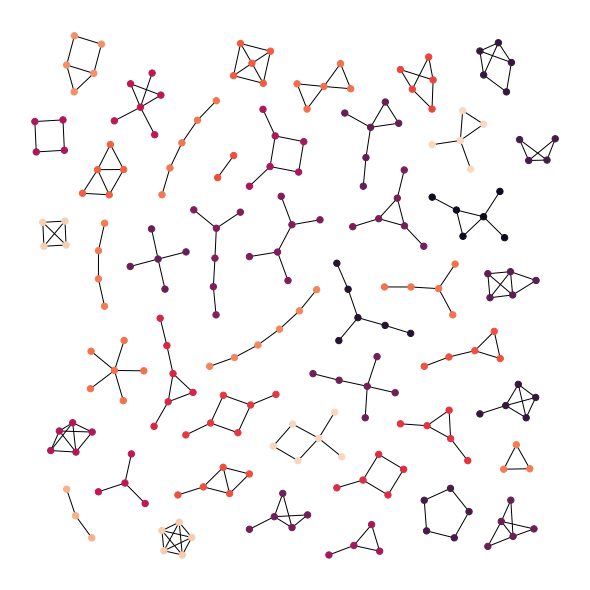

In [1]:
# Percolation Concept Map
# Atlas Figure
import random
import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher

print(nx.graph_atlas_g()[0])

def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:100]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U

G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.savefig("")
plt.show()

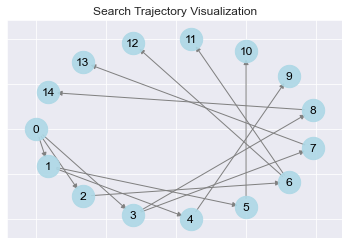

In [2]:
# Network Figure
import networkx as nx
import matplotlib.pyplot as plt

# Define the search trajectory as a tree-like structure
search_trajectory = {
    '0': ['1', '2', '3'],
    '1': ['4', '5'],
    '2': ['6'],
    '3': ['7', '8'],
    '4': ['9'],
    '5': ['10'],
    '6': ['11', '12'],
    '7': ['13'],
    '8': ['14'],
    '9': [],
    '10': [],
    '11': [],
    '12': [],
    '13': [],
    '14': []
}

# Create a directed graph using networkx
G = nx.DiGraph(search_trajectory)

# Create a figure and axis
fig, ax = plt.subplots()

# Set the layout of the graph (e.g., 'shell', 'spring', 'spectral', 'random', etc.)
pos = nx.shell_layout(G)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=500, node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', arrows=True)

# Set the labels for the nodes
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, ax=ax, labels=node_labels)

# Set the title
plt.title('Search Trajectory Visualization')

# Show the plot
plt.show()
